In [ ]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [ ]:
df = pd.read_csv('/content/Grammar Correction.csv')

In [ ]:
df.sample(5)

,Serial Number,Error Type,Ungrammatical Statement,Standard English
1751,1752,Abbreviation Errors,The avg temp in the city is 75°F in the sum.,The average temperature in the city is 75 degr...
1592,1593,Ellipsis Errors,He studied for weeks... failed the exam.,He studied for weeks but still failed the exam.
129,130,Subject-Verb Agreement,The couple takes a walk in the park every even...,The couple take a walk in the park every evening.
988,989,Conjunction Misuse,"The weather is sunny, but it is also windy.",The weather is sunny and also windy.
406,407,Sentence Structure Errors,The childrens had a lot of fun at the playground.,The children had a lot of fun at the playground.


In [ ]:
def show_random_datapoints(n_samples, df):
  for i in range(n_samples):
    id = int(np.random.uniform(0,len(df)))

    if len(df['Standard English'].iloc[id].split())>5 and df['Standard English'].iloc[id] != df['Ungrammatical Statement'].iloc[id]:
      print(f"Standard: {df['Standard English'].iloc[id]}")
      print(f"Ungrammatical: {df['Ungrammatical Statement'].iloc[id]}")
      print('*'*100)

In [ ]:
show_random_datapoints(10, df)

Standard: The movie was entertaining and thought-provoking.
Ungrammatical: The movie was entertaining, but it was also thought-provoking.
****************************************************************************************************
Standard: The students were encouraged to ask questions during the lecture.
Ungrammatical: The students were encourage to ask questions during the lecture.
****************************************************************************************************
Standard: She was very tired after work.
Ungrammatical: She very tired after work.
****************************************************************************************************
Standard: She is learning a new language at the school.
Ungrammatical: She is learning a new language at a school.
****************************************************************************************************
Standard: I love music, and I listen to it all the time.
Ungrammatical: I love music I listen to it all 

In [ ]:
df.shape

(2018, 4)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import re
tqdm.pandas()


In [ ]:
df.sample(10)

,Serial Number,Error Type,Ungrammatical Statement,Standard English
1284,1285,Inappropriate Register,The candidate has demonstrated exceptional ski...,The candidate has demonstrated exceptional ski...
1922,1923,Gerund and Participle Errors,He is talented for playing the guitar.,He is talented at playing the guitar.
1585,1586,Ellipsis Errors,I enjoy reading books... history and science f...,I enjoy reading books about history and scienc...
333,334,Preposition Usage,I will come back from work in 5 PM.,I will come back from work at 5 PM.
1259,1260,Tautology,He was completely devastated and heartbroken.,He was completely devastated.
1267,1268,Tautology,The room was completely empty and vacant.,The room was completely empty.
1393,1394,Mixed Conditionals,"If you paid attention, you will understand the...","If you paid attention, you would understand th..."
1598,1599,Ellipsis Errors,I love coffee... only drink it in the morning.,"I love coffee, but I only drink it in the morn..."
1186,1187,Quantifier Errors,Many of the plants in this garden are native t...,Many plants in this garden are native to the r...
791,792,Sentence Fragments,"The rain, heavy, streets flooded.","The rain was heavy, and the streets were flooded."


**Adding Length Features**

In [ ]:
df["ungrammatical_statement_length"] = df["Ungrammatical Statement"].astype('str').apply(lambda x:len(x))
df["standard_english_length"] = df["Standard English"].astype('str').apply(lambda x:len(x))

In [ ]:
df["ungrammatical_statement_length"] = df["Ungrammatical Statement"].astype('str').apply(lambda x:len(x.split()))
df["standard_english_length"] = df["Standard English"].astype('str').astype('str').apply(lambda x:len(x.split()))

In [ ]:
df.sample(5)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,ungrammatical_statement_length,standard_english_length
1951,1952,Gerund and Participle Errors,The athlete was disqualify for using performan...,The athlete was disqualified for using perform...,8,8
122,123,Subject-Verb Agreement,The students in the class was excited about th...,The students in the class were excited about t...,11,11
1934,1935,Gerund and Participle Errors,The company is committed to reduce its carbon ...,The company is committed to reducing its carbo...,9,9
867,868,Mixed Metaphors/Idioms,"30. Don't judge a book by its cover, but every...",30. Don't judge a book by its cover.,14,8
1279,1280,Inappropriate Register,The manager requested that John submits his re...,The manager requested that John submit his rep...,9,12


**Preprocessing**

**Removing Missing/NA**

In [ ]:
df.isna().sum()

,0
Serial Number,0
Error Type,0
Ungrammatical Statement,0
Standard English,0
ungrammatical_statement_length,0
standard_english_length,0


In [ ]:
df[df.isna().any(axis=1)]

,Serial Number,Error Type,Ungrammatical Statement,Standard English,ungrammatical_statement_length,standard_english_length


**Keeping unique sentence pair**

In [ ]:
print("Total number of duplicate pairs")
print(f"{len(df[df['Standard English']==df['Ungrammatical Statement']])}")

Total number of duplicate pairs
68


In [ ]:
df[df['Standard English']==df['Ungrammatical Statement']]

,Serial Number,Error Type,Ungrammatical Statement,Standard English,ungrammatical_statement_length,standard_english_length
28,29,Verb Tense Errors,He will finish the race in an hour.,He will finish the race in an hour.,8,8
225,226,Article Usage,The movie is based on a true story.,The movie is based on a true story.,8,8
233,234,Article Usage,The boy is playing with a toy car.,The boy is playing with a toy car.,8,8
241,242,Article Usage,The athlete is training for a marathon race.,The athlete is training for a marathon race.,8,8
419,420,Sentence Structure Errors,We played soccer and basketball at the park ye...,We played soccer and basketball at the park ye...,9,9
...,...,...,...,...,...,...
1457,1458,Faulty Comparisons,The new employee is more punctual than the old...,The new employee is more punctual than the old...,10,10
1462,1463,Faulty Comparisons,The presentation was more boring than the lect...,The presentation was more boring than the lect...,8,8
1515,1516,Incorrect Auxiliaries,The children do their chores every day.,The children do their chores every day.,7,7
1810,1811,Contractions Errors,"The sun's rays are strong, they're making the ...","The sun's rays are strong, they're making the ...",10,10


In [ ]:
df.shape

(2018, 6)

For being the dataset small, i will keep the rows where both ungrammatical and standard english are same.

In [ ]:
## For removing the rows which i will keep for now

# df = df[df['correct']!=df['incorrect']]
# print(f'total number of duplicates: {final_df.duplicated().sum()}')
# final_df[final_df.duplicated(keep=False)].sort_values('correct')
# final_df = final_df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.sample(5)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,ungrammatical_statement_length,standard_english_length
1341,1342,Ambiguity,She must of forgotten her keys.,She must have forgotten her keys.,6,6
1869,1870,Infinitive Errors,He decided to quickly finish his homework.,He decided to finish his homework quickly.,7,7
262,263,Article Usage,The author is signing a copies of her new book.,The author is signing copies of her new book.,10,9
1857,1858,Relative Clause Errors,The mechanic fixed my car is very skilled.,The mechanic who fixed my car is very skilled.,8,9
60,61,Verb Tense Errors,The children has fun at the amusement park.,The children had fun at the amusement park.,8,8


In [ ]:
df.shape

(2018, 6)

**Removing small sentences**

In [ ]:
# df[df['ungrammatical_statement_length']<2].shape
# df = df[df['ungrammatical_statement_length']<2].reset_index(drop=True)

# final_df[final_df['correct_char_count']<2].shape
# final_df = final_df[final_df['correct_char_count']>2].reset_index(drop=True)


In [ ]:
df.shape

(2018, 6)

In [ ]:
df.sample(5)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,ungrammatical_statement_length,standard_english_length
1582,1583,Ellipsis Errors,My favorite ice cream flavors are... chocolate...,My favorite ice cream flavors are chocolate an...,9,9
798,799,Sentence Fragments,"The book, fascinating, couldn't put it down.",The book was so fascinating that I couldn't pu...,7,11
1354,1355,Ambiguity,The girl hair was long and curly.,The girl's hair was long and curly.,7,7
476,477,Sentence Structure Errors,She goes to the gym every day to exercising.,She goes to the gym every day to exercise.,9,9
1012,1013,Conjunction Misuse,"The city is crowded, but it is lively.",The city is crowded and lively.,8,6


**Clean Text**

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have","n\'t":" not","\'re":" are","\'s": " is","\'d":" would",
                     "\'ll": " will","\'t":" not","\'ve": " have","\'m":" am"}

#Regular expression for finfding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#functions for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
      return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)




In [ ]:
# https://stackoverflow.com/a/47091490/4084039
def clean(text):
    text = re.sub('\s*\<.*?\>\s', '', text)
    text = re.sub('\s*\(.*?\)\s', '', text)
    text = re.sub('\s*\[.*?\]\s', '', text)
    text = re.sub('\s*\{.*?\}\s', '', text)
    text = re.sub("[-+@#^/|*(){}$~<>=_%:;]","",text)
    text = text.replace("\\","")
    text = re.sub("\[","",text)
    text = re.sub("\]","",text)
    text = re.sub("\<","",text)
    text = re.sub("\>","",text)
    text = re.sub("\(","",text)
    text = re.sub("\)","",text)
    text = re.sub("[0-9]","",text)
    text = ' '.join(text.split())
    return text

In [ ]:
df['Standard English'] = df['Standard English'].progress_apply(clean)
df['Standard English'] = df['Standard English'].progress_apply(expand_contractions)

100%|██████████| 2018/2018 [00:00<00:00, 24424.47it/s]


In [ ]:
df['Ungrammatical Statement'] = df['Ungrammatical Statement'].progress_apply(clean)
df['Ungrammatical Statement'] = df['Ungrammatical Statement'].progress_apply(expand_contractions)

100%|██████████| 2018/2018 [00:00<00:00, 9392.48it/s]


In [ ]:
df.sample(5)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,ungrammatical_statement_length,standard_english_length
682,683,Capitalization Errors,we went to paris last summer.,We went to Paris last summer.,6,6
1129,1130,Parallelism Errors,"John needs to clean his room, the car, and org...","John needs to clean his room, the car, and org...",12,12
1522,1523,Negation Errors,I do not know nothing about cars.,I do not know anything about cars.,6,6
141,142,Subject-Verb Agreement,The collection of short stories have a common ...,The collection of short stories has a common t...,9,9
1163,1164,Parallelism Errors,"The company values innovation, collaboration, ...","The company values innovation, collaboration, ...",12,10


In [ ]:
df.isna().sum()

,0
Serial Number,0
Error Type,0
Ungrammatical Statement,0
Standard English,0
ungrammatical_statement_length,0
standard_english_length,0


**Exploitary Data Analysis**

In [ ]:
!pip install textstat

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import missingno as msno
from google.colab import data_table
from tabulate import tabulate
import scipy.stats as st
import matplotlib as mpl
import matplotlib.patches as mpl_patches
import matplotlib.cm as cm
import matplotlib.lines as mlines
import re
import nltk
import spacy
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from textstat import flesch_reading_ease
tqdm.pandas()
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df.shape

(2018, 6)

In [ ]:
df.sample(5)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,ungrammatical_statement_length,standard_english_length
160,161,Subject-Verb Agreement,The group of fish swim together in the tank.,The group of fish swims together in the tank.,9,9
1795,1796,Contractions Errors,The team lost they are motivation after the loss.,The team lost their motivation after the loss.,8,8
211,212,Article Usage,She is an expert on a human behavior.,She is an expert on human behavior.,8,7
849,850,Mixed Metaphors/Idioms,". The ball is in your court, but every cloud h...",. The ball is in your court.,14,7
738,739,Run-on Sentences,I went to the store I bought groceries.,"I went to the store, and I bought groceries.",8,9


**Unverified Analysis(KDE Plots)**

In [ ]:
def plot_univariate(df,feature_name):
    '''Plots KDE plot of specified feature name from dataframe'''
    random_color = (random.random(), random.random(), random.random())
    df.plot(kind='kde',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'KDE-{feature_name.replace("_"," ")}')
    plt.show()

In [ ]:
def show_percentiles(df,feature_name,quantile_range,quantile_incr):
  '''shows quantiles  of specified feature name from dataframe in specified range'''
  quantiles = np.arange(quantile_range[0],quantile_range[1],quantile_incr)
  quant_array = [np.percentile(df[feature_name], i) for i in quantiles]
  return pd.DataFrame(quant_array,columns=[feature_name]).set_index(quantiles).transpose()

Character Count

Correct Sentences

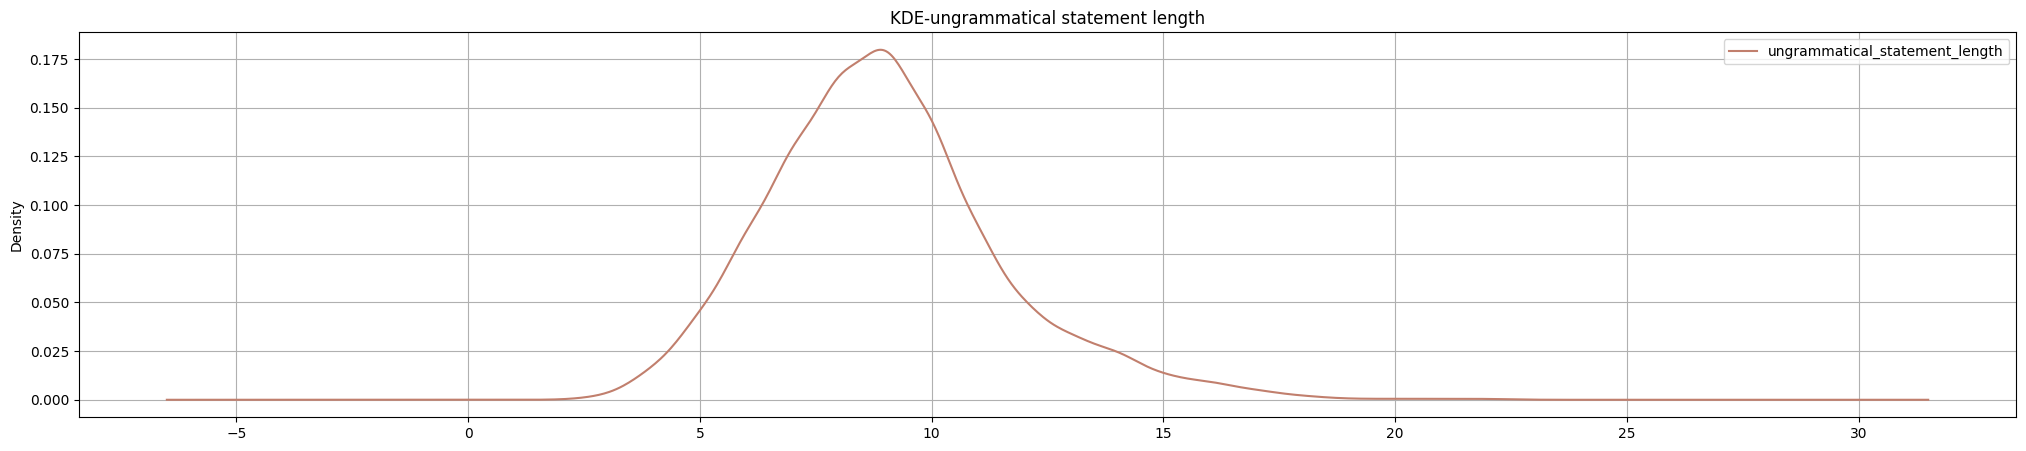

In [ ]:
plot_univariate(df,'ungrammatical_statement_length')

In [ ]:
df['ungrammatical_statement_length'].describe()

,ungrammatical_statement_length
count,2018.000000
mean,8.989098
std,2.520886
min,3.000000
25%,7.000000
50%,9.000000
75%,10.000000
max,22.000000


In [ ]:
show_percentiles(df,'ungrammatical_statement_length',(0,101),5)

,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
ungrammatical_statement_length,3.0,5.0,6.0,7.0,7.0,7.0,8.0,8.0,8.0,9.0,...,9.0,9.0,10.0,10.0,10.0,11.0,11.0,12.0,14.0,22.0


In [ ]:
show_percentiles(df,'ungrammatical_statement_length',(90,101),1)

,90,91,92,93,94,95,96,97,98,99,100
ungrammatical_statement_length,12.0,12.0,13.0,13.0,13.0,14.0,14.0,15.0,15.0,16.0,22.0


In [ ]:
show_percentiles(df,'ungrammatical_statement_length',(98.1,100),0.1)

,98.1,98.2,98.3,98.4,98.5,98.6,98.7,98.8,98.9,99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100.0
ungrammatical_statement_length,15.0,15.694,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,17.0,17.0,17.0,17.0,17.0,18.0,18.0,19.983,22.0


In [ ]:
show_percentiles(df,'ungrammatical_statement_length',(99.9,100),0.01)

,99.90,99.91,99.92,99.93,99.94,99.95,99.96,99.97,99.98,99.99
ungrammatical_statement_length,19.983,20.1847,20.3864,20.5881,20.7898,20.9915,21.1932,21.3949,21.5966,21.7983


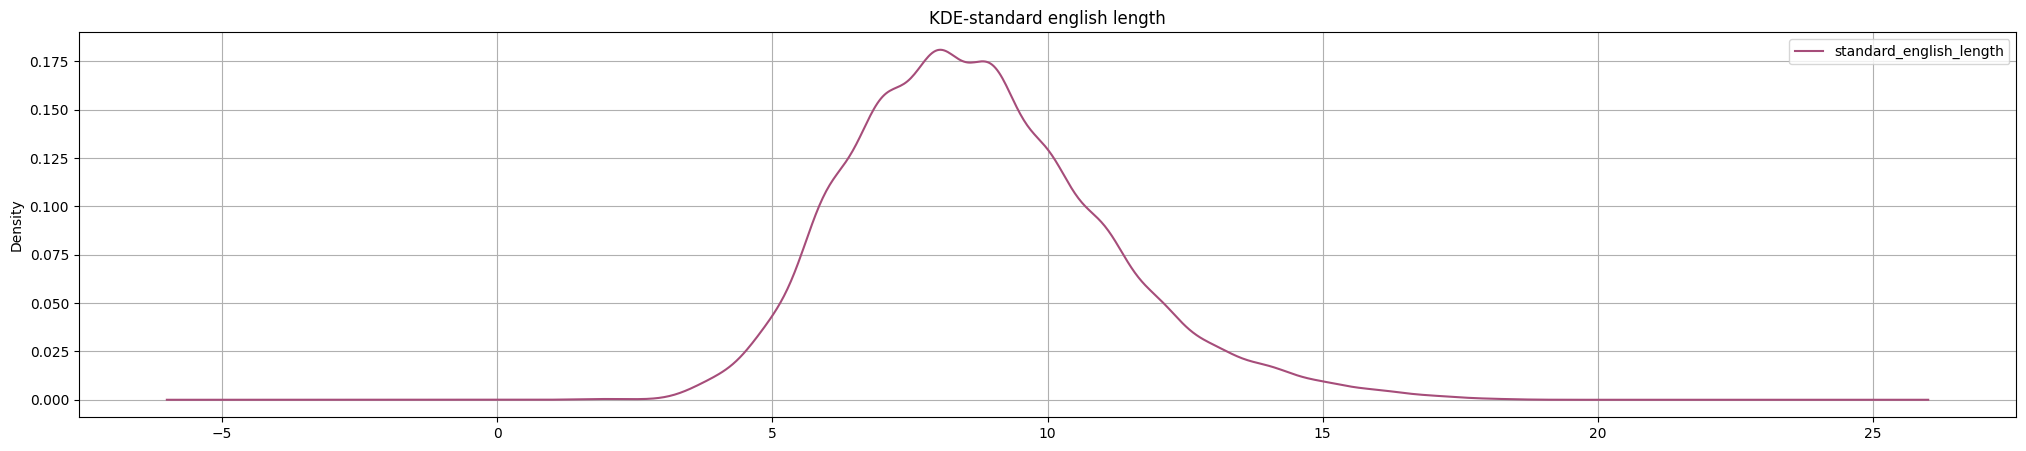

In [ ]:
plot_univariate(df,'standard_english_length')

In [ ]:
df['standard_english_length'].describe()

,standard_english_length
count,2018.000000
mean,8.725471
std,2.273111
min,2.000000
25%,7.000000
50%,9.000000
75%,10.000000
max,18.000000


In [ ]:
show_percentiles(df,'standard_english_length',(0,101),5)

,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
standard_english_length,2.0,6.0,6.0,6.0,7.0,7.0,7.0,8.0,8.0,8.0,...,9.0,9.0,9.0,10.0,10.0,11.0,11.0,12.0,13.0,18.0


In [ ]:
show_percentiles(df,'standard_english_length',(90,101),1)

,90,91,92,93,94,95,96,97,98,99,100
standard_english_length,12.0,12.0,12.0,12.0,12.98,13.0,13.0,14.0,14.0,15.0,18.0


In [ ]:
show_percentiles(df,'standard_english_length',(98.1,100),0.1)

,98.1,98.2,98.3,98.4,98.5,98.6,98.7,98.8,98.9,99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100.0
standard_english_length,14.0,14.0,14.0,14.728,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.881,16.0,16.0,16.0,16.0,16.966,17.0,18.0


In [ ]:
show_percentiles(df,'standard_english_length',(99.9,100),0.01)

,99.90,99.91,99.92,99.93,99.94,99.95,99.96,99.97,99.98,99.99
standard_english_length,17.0,17.0,17.0,17.0,17.0,17.0,17.1932,17.3949,17.5966,17.7983


**Bivariate Analysis(Scatter Plots)**

In [ ]:
from tkinter.constants import Y
def plot_scatter(df,feat_1,feat_2,title):
  fig,axs = plt.subplots(figsize=(10,10))
  x = sorted(list(df[feat_1]))
  y = sorted(list(df[feat_2]))
  random_color = (random.random(), random.random(), random.random())
  axs.scatter(x,y,marker=".",label=feat_1,color=random_color)
  line = mlines.Line2D([0,1], [0,1], color='black', linestyle=':',label='Normal Line')
  transform = axs.transAxes
  line.set_transform(transform)
  axs.add_line(line)
  axs.set_ylabel(feat_2)
  axs.grid()
  axs.set_xlabel(feat_1)
  axs.annotate(f"Correlation Score:{round((np.corrcoef(x,y)[0][1]),4)}", xy=(0.7,0.5), xycoords='axes fraction',
               bbox=dict(boxstyle="round", fc="none", ec="gray"),
               xytext=(10, -40), textcoords='offset points', ha='center',fontsize=16)
  if title:
    plt.title(title)
  plt.show()

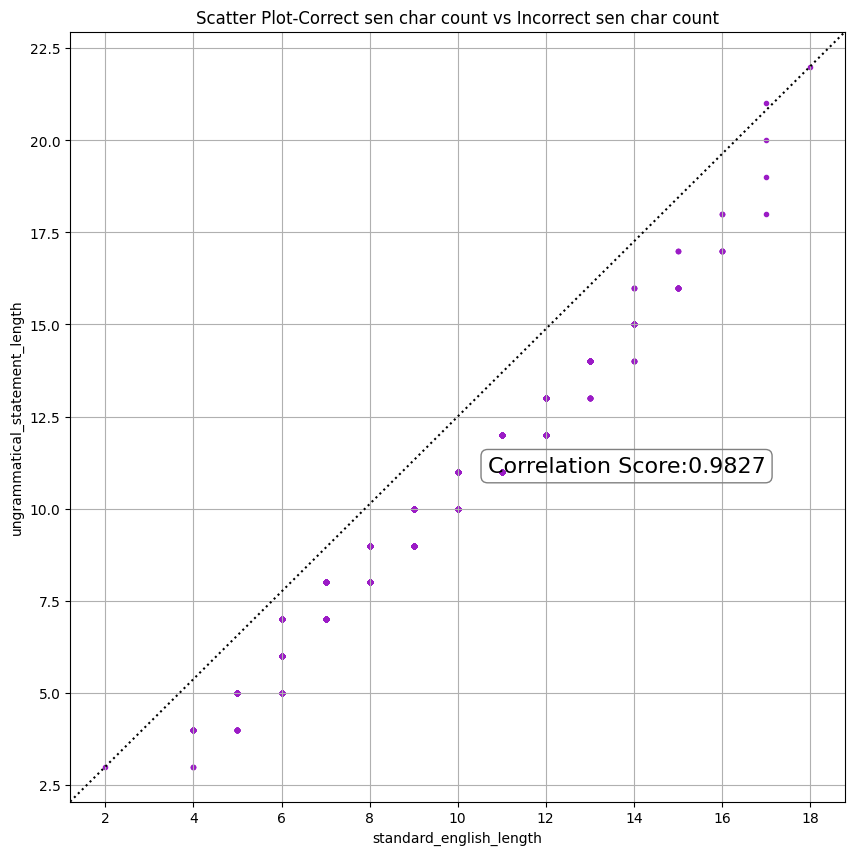

In [ ]:
plot_scatter(df,'standard_english_length','ungrammatical_statement_length',title='Scatter Plot-Correct sen char count vs Incorrect sen char count')

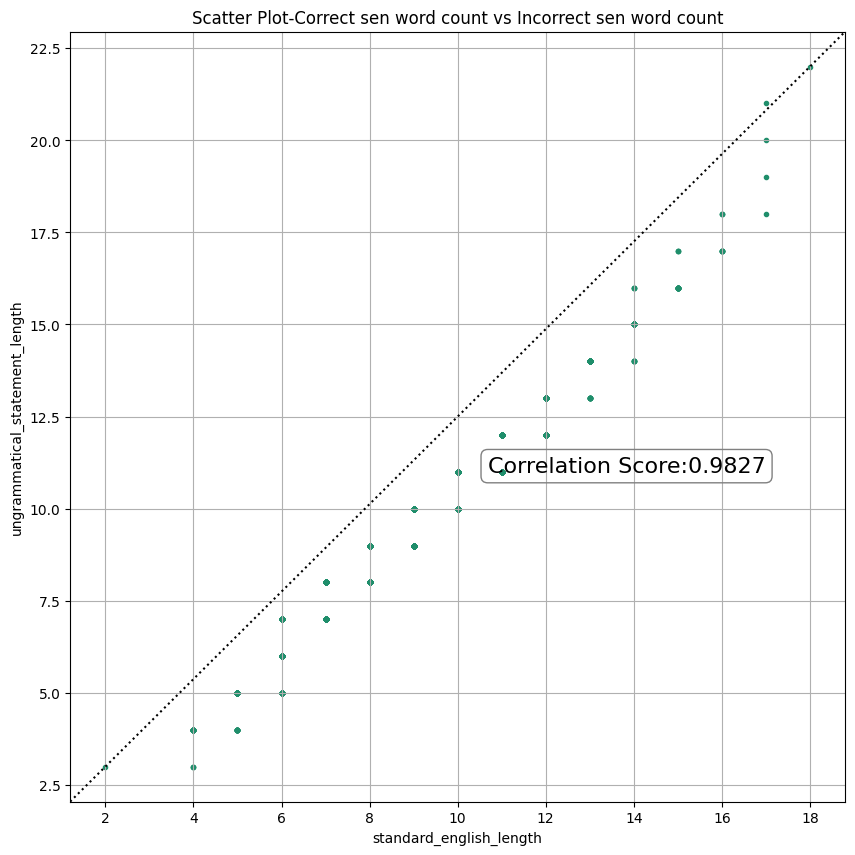

In [ ]:
plot_scatter(df,'standard_english_length','ungrammatical_statement_length',title='Scatter Plot-Correct sen word count vs Incorrect sen word count')

**Stopward analysis**

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Define or pass a stopword list
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop  # Example using scikit-learn stopwords

def plot_top_stopwords(text, n_top=10, title=None, stopwords=stop):
    # Tokenize text
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    # Count stopwords in corpus
    stopword_dict = defaultdict(int)
    for word in corpus:
        if word in stopwords:
            stopword_dict[word] += 1

    # Create DataFrame for plotting
    df = pd.DataFrame(list(stopword_dict.items()), columns=['word', 'frequency'])
    df['percentage'] = df['frequency'] * 100 / df['frequency'].sum()
    df = df.sort_values('frequency', ascending=False).head(n_top)

    # Plot
    fig, ax = plt.subplots(figsize=(12, n_top / 2))
    ax = sns.barplot(x="frequency", y="word", data=df, palette="nipy_spectral_r", orient='h')

    # Add text labels to bars
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        ax.text(width + 1, p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width) + ' (' + str(round(df['percentage'].iloc[i], 2)) + '%)',
                ha='left', va='center')

    # Adjust x-axis limit
    ax.set_xlim(xmin=0.0, xmax=max(df['frequency']) * 1.1)

    # Set title if provided
    if title:
        plt.title(title)

    plt.show()

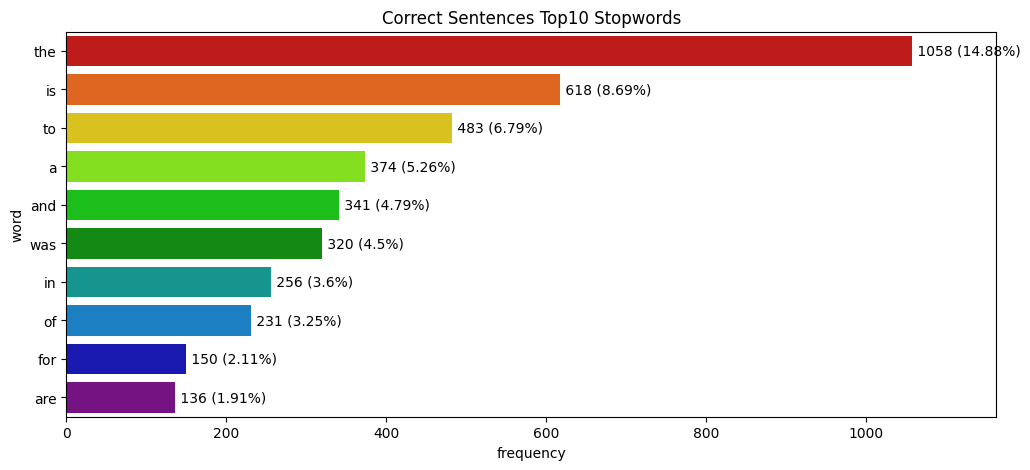

In [ ]:
plot_top_stopwords(df['Standard English'],title='Correct Sentences Top10 Stopwords')

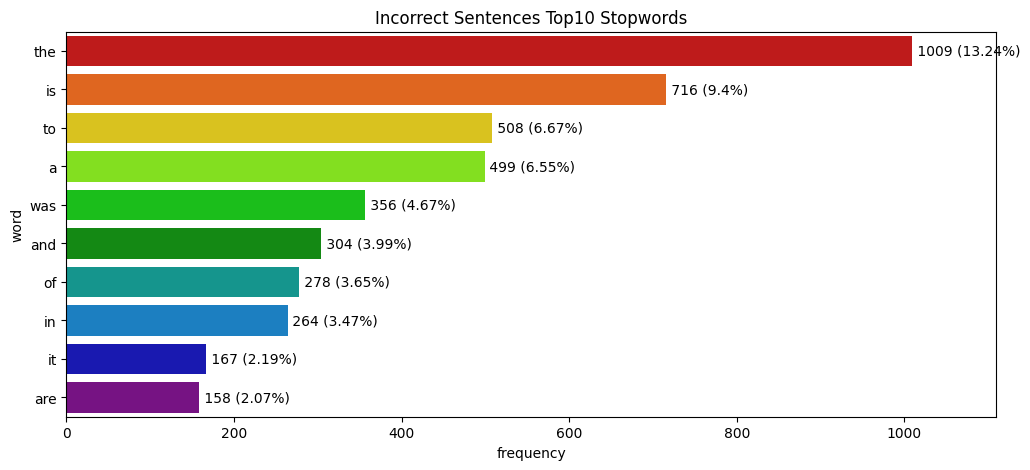

In [ ]:
plot_top_stopwords(df['Ungrammatical Statement'].astype(str),title='Incorrect Sentences Top10 Stopwords')

**N-gram Analysis For Ungrammatical Statment**

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter

tokens = [nltk.word_tokenize(sentence.lower()) for sentence in df['Ungrammatical Statement']]

#bi-grams and tri-grams
bi_grams = [gram for sentence in tokens for gram in bigrams(sentence)]
tri_grams = [gram for sentence in tokens for gram in trigrams(sentence)]

#counting
bi_grams_freq = Counter(bi_grams)
tri_grams_freq = Counter(tri_grams)

#most common bi-grams and tri-grams
most_common_bi = bi_grams_freq.most_common(20)
most_common_tri = tri_grams_freq.most_common(20)

most_common_bi, most_common_tri

([(('in', 'the'), 142),
  ((',', 'and'), 142),
  (('it', 'is'), 108),
  ((',', 'but'), 100),
  (('to', 'the'), 87),
  (('of', 'the'), 83),
  (('.', 'the'), 82),
  (('by', 'the'), 79),
  (('he', 'is'), 70),
  (('she', 'is'), 65),
  (('at', 'the'), 60),
  (('on', 'the'), 53),
  (('is', 'a'), 50),
  (('the', 'store'), 45),
  (('they', 'are'), 43),
  (('and', 'to'), 43),
  (('than', 'the'), 42),
  (('for', 'the'), 37),
  (('the', 'car'), 37),
  (('the', 'movie'), 35)],
 [((',', 'and', 'to'), 43),
  ((',', 'but', 'it'), 32),
  (('but', 'it', 'is'), 26),
  ((',', 'and', 'it'), 23),
  (('went', 'to', 'the'), 20),
  (('the', 'movie', 'was'), 19),
  ((',', 'it', 'is'), 19),
  (('to', 'the', 'store'), 18),
  (('the', 'company', 'is'), 18),
  (('is', 'the', 'most'), 16),
  (('the', 'group', 'of'), 15),
  (('i', 'need', 'to'), 13),
  (('and', 'it', 'is'), 13),
  (('in', 'the', 'park'), 12),
  (('the', 'park', '.'), 12),
  (('he', 'is', 'a'), 12),
  (('going', 'to', 'the'), 12),
  (('she', 'is', 'a

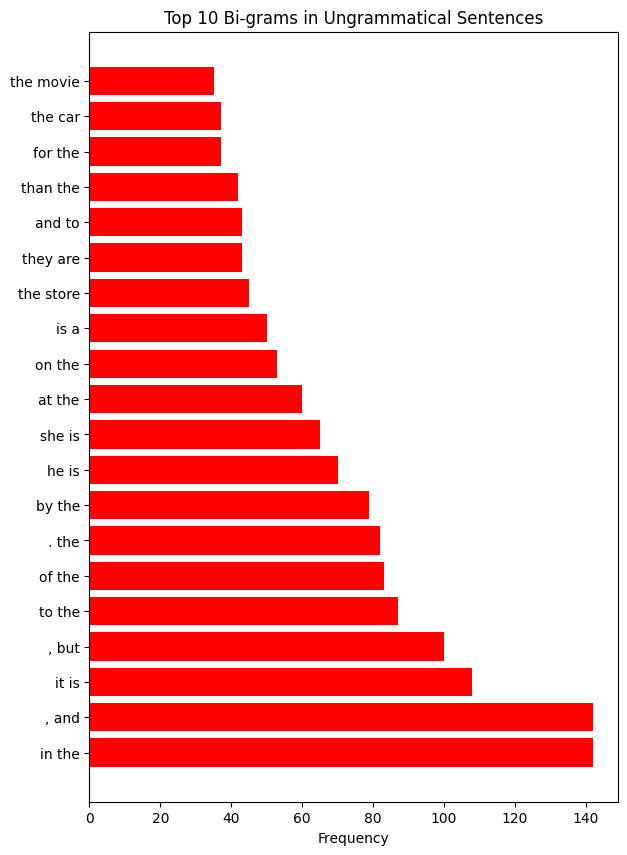

In [ ]:
bi_grams, bi_freq = zip(*most_common_bi)

#converting n gram tuples to strings
bi_grams_str = [' '.join(gram) for gram in bi_grams]

plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.barh(bi_grams_str, bi_freq, color='red')
plt.xlabel('Frequency')
plt.title('Top 10 Bi-grams in Ungrammatical Sentences')

plt.show()

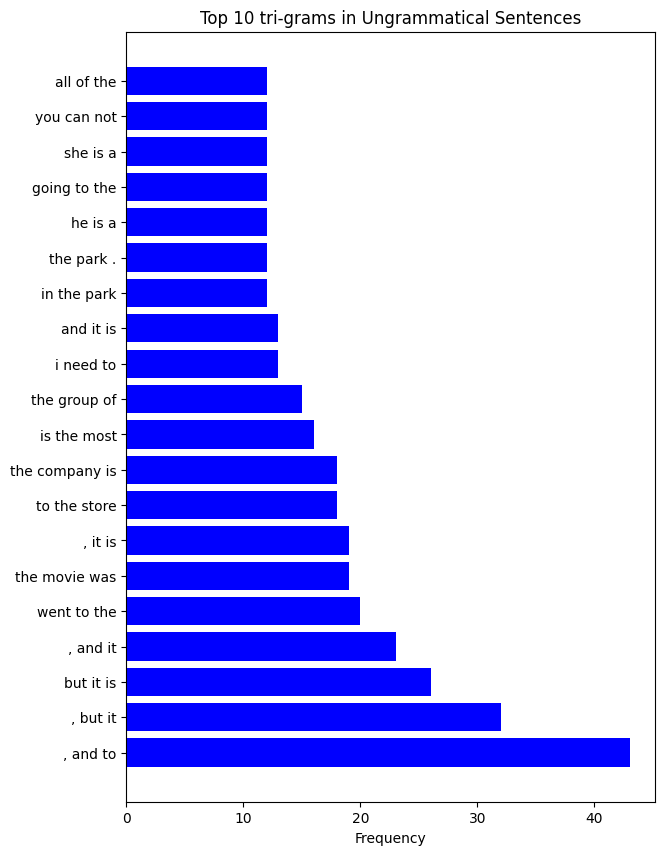

In [ ]:
tri_grams, tri_freq = zip(*most_common_tri)

#converting n gram tuples to strings
tri_grams_str = [' '.join(gram) for gram in tri_grams]

plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.barh(tri_grams_str, tri_freq, color='blue')
plt.xlabel('Frequency')
plt.title('Top 10 tri-grams in Ungrammatical Sentences')

plt.show()

**Wordcloud**

In [ ]:
def generate_wordcloud(text):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in tqdm(text):
        words=[w for w in word_tokenize(news) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

In [ ]:
def plot_wordcloud(corpus,title=None):
    wordcloud = WordCloud(background_color='white',stopwords=set(STOPWORDS),
                          max_words=100,max_font_size=30,scale=3,random_state=1)
    wordcloud=wordcloud.generate(str(corpus))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    if title:
        plt.title(title)
    plt.show()

In [ ]:
standard_english_wordcloud = generate_wordcloud(df['Standard English'])

100%|██████████| 2018/2018 [00:02<00:00, 754.40it/s]


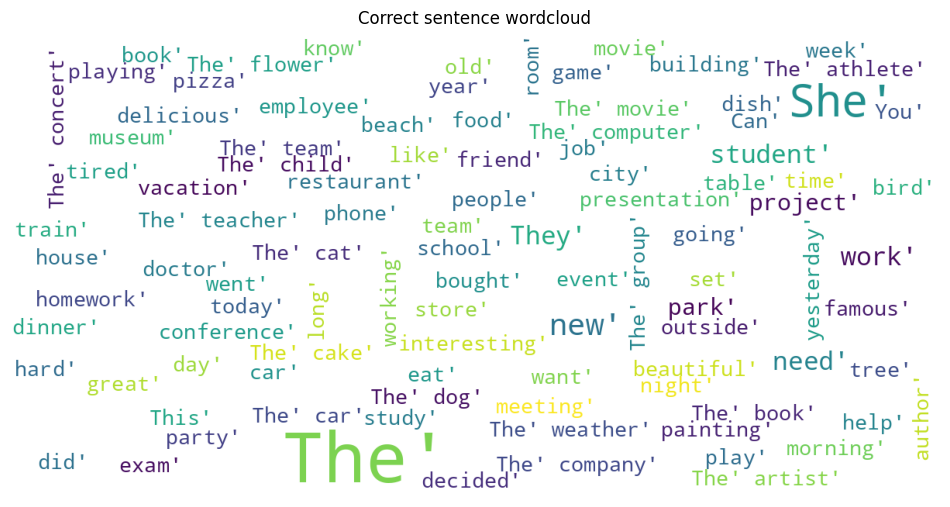

In [ ]:
plot_wordcloud(standard_english_wordcloud,'Correct sentence wordcloud')

In [ ]:
ungrammatical_statement_wordcloud = generate_wordcloud(df['Ungrammatical Statement'].astype(str))

100%|██████████| 2018/2018 [00:02<00:00, 691.52it/s]


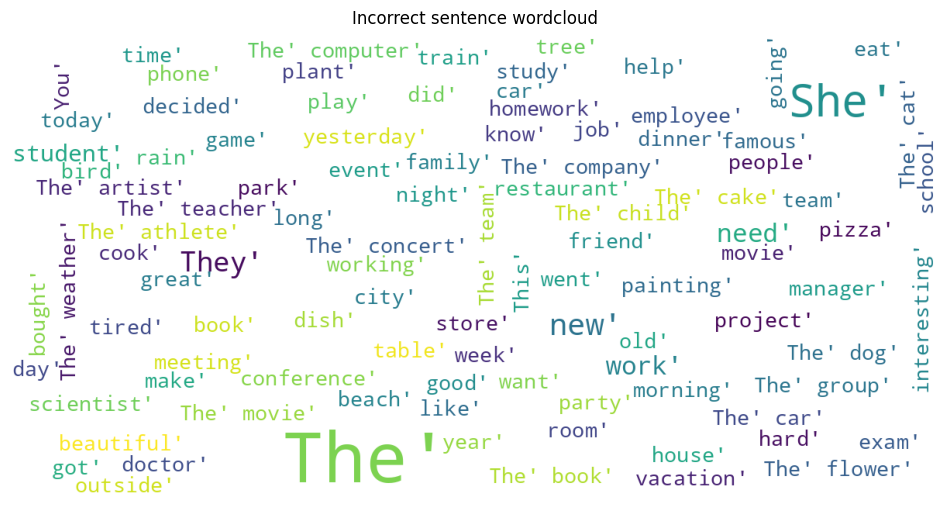

In [ ]:
plot_wordcloud(ungrammatical_statement_wordcloud,'Incorrect sentence wordcloud')

**Sentiment Analysis**

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df['standard_english_polscore'] = df['Standard English'].astype(str).apply(polarity)
df['ungrammatical_statement_polscore'] = df['Ungrammatical Statement'].astype(str).apply(polarity)

In [ ]:
def sentiment(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
def plot_polarity(polarity_scores, title=None):
    # Dynamically classify the polarity scores as sentiment
    sentiment_labels = polarity_scores.apply(sentiment)

    # Plot sentiment distribution
    fig, ax = plt.subplots(figsize=(10, 7))
    sizes_Class_Disb = sentiment_labels.value_counts()
    labels_Class_Disb = sizes_Class_Disb.index

    # Create percentage labels for the pie chart
    pcts_Class_Disb = [f'{label} - {count} Points \n({count * 100 / sum(sizes_Class_Disb):.2f}%)'
                       for label, count in zip(labels_Class_Disb, sizes_Class_Disb)]

    # Plot pie chart
    ax.pie(sizes_Class_Disb, labels=pcts_Class_Disb, startangle=90,
           explode=(0.05, 0.05, 0.05), colors=('gray', '#2a9d8f', '#e76f51'),
           textprops={"fontsize": 12})

    # Set title
    if title:
        plt.suptitle(title, fontsize=15)
    plt.title(f'(No Of Data Points: {sum(sizes_Class_Disb)})', fontsize=12)
    plt.show()

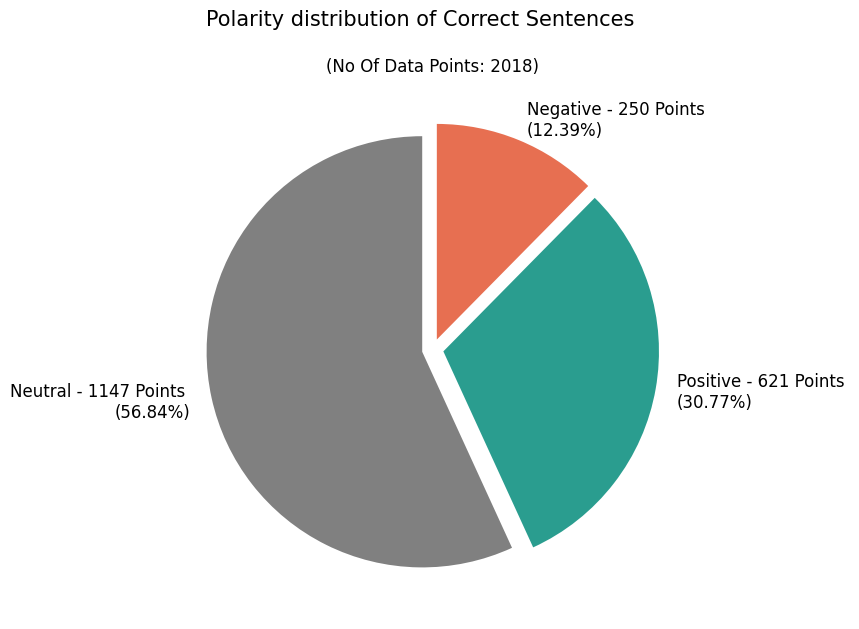

In [ ]:
plot_polarity(df['standard_english_polscore'],'Polarity distribution of Correct Sentences')

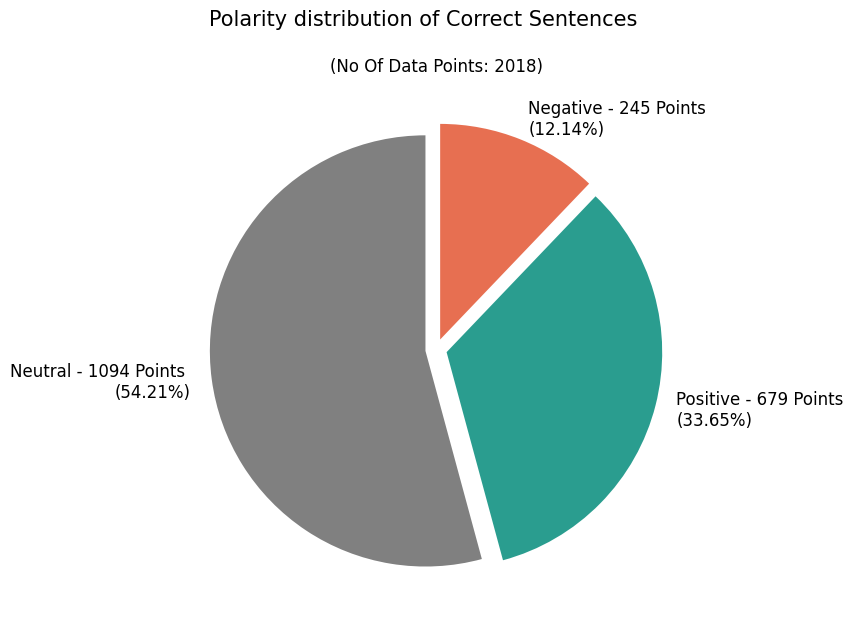

In [ ]:
plot_polarity(df['ungrammatical_statement_polscore'],'Polarity distribution of Correct Sentences')

**Text complexity using Flesch Reading Ease (FRE)**

In [ ]:
df['ungrammatical_complexity_score'] = df['Ungrammatical Statement'].progress_apply(flesch_reading_ease)

100%|██████████| 2018/2018 [00:00<00:00, 12739.86it/s]


In [ ]:
df['standard_complexity_score'] = df['Standard English'].astype(str).progress_apply(flesch_reading_ease)

100%|██████████| 2018/2018 [00:00<00:00, 12660.70it/s]


In [ ]:
#https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests
def complexity(x):
    if x<10:
        return 'Professional'
    elif x>10 and x<=30:
        return 'College graduate(Very Difficult)'
    elif x>30 and x<=50:
        return 'College (Difficult)'
    elif x>50 and x<=60:
        return '10th to 12th grade(Fairly difficult)'
    elif x>60 and x<=70:
        return '8th & 9th grade(Plain English)'
    elif x>70 and x<=80:
        return '7th grade(Fairly easy)'
    elif x>80 and x<=90:
        return '6th grade(Easy to read)'
    elif x>90:
        return '5th grade(Very easy)'

In [ ]:
df['ungrammatical_complexity'] = df['ungrammatical_complexity_score'].progress_apply(complexity)

100%|██████████| 2018/2018 [00:00<00:00, 289628.57it/s]


In [ ]:
df['standard_complexity'] = df['standard_complexity_score'].progress_apply(complexity)

100%|██████████| 2018/2018 [00:00<00:00, 291523.92it/s]


In [ ]:
# Function to plot distribution as a pie chart with complexity annotations
def plot_complexity(df, feature, title=None):
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

    # Step 1: Get the distribution of the feature
    disb_dict = dict(df[feature].value_counts())
    data = disb_dict.values()
    data_labels = list(disb_dict.keys())

    # Step 2: Pick a random colormap using plt.colormaps() instead of cmap_d
    cmap_list = plt.colormaps()  # Get list of available colormaps
    selected_cmap = random.choice(cmap_list)  # Randomly choose one
    theme = plt.get_cmap(selected_cmap)

    # Apply the selected color map to wedges
    ax.set_prop_cycle("color", [theme(1. * i / len(data)) for i in range(len(data))])

    # Step 3: Create the pie chart with wedge widths and starting angle
    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.2), startangle=-40)

    # Step 4: Prepare labels and format them
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    # Prepare percentage labels outside the loop
    pcts_Class_Disb = [f'{l} - {s} Points ({s*100/sum(data):.2f}%)' for s, l in zip(data, data_labels)]

    # Step 5: Annotate each wedge with its percentage and data
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1) / 2. + p.theta1  # Calculate angle of the annotation
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})

        # Annotate each wedge with data and percentage
        ax.annotate(pcts_Class_Disb[i], xy=(x, y), xytext=(1.25 * np.sign(x), 1.7 * y),
                    horizontalalignment=horizontalalignment, **kw)

    # Step 6: Set the title and show the plot
    plt.title(f'(No Of Data Points: {sum(data)})', fontsize=12)
    if title:
        plt.suptitle(title, fontsize=16)
    plt.show()

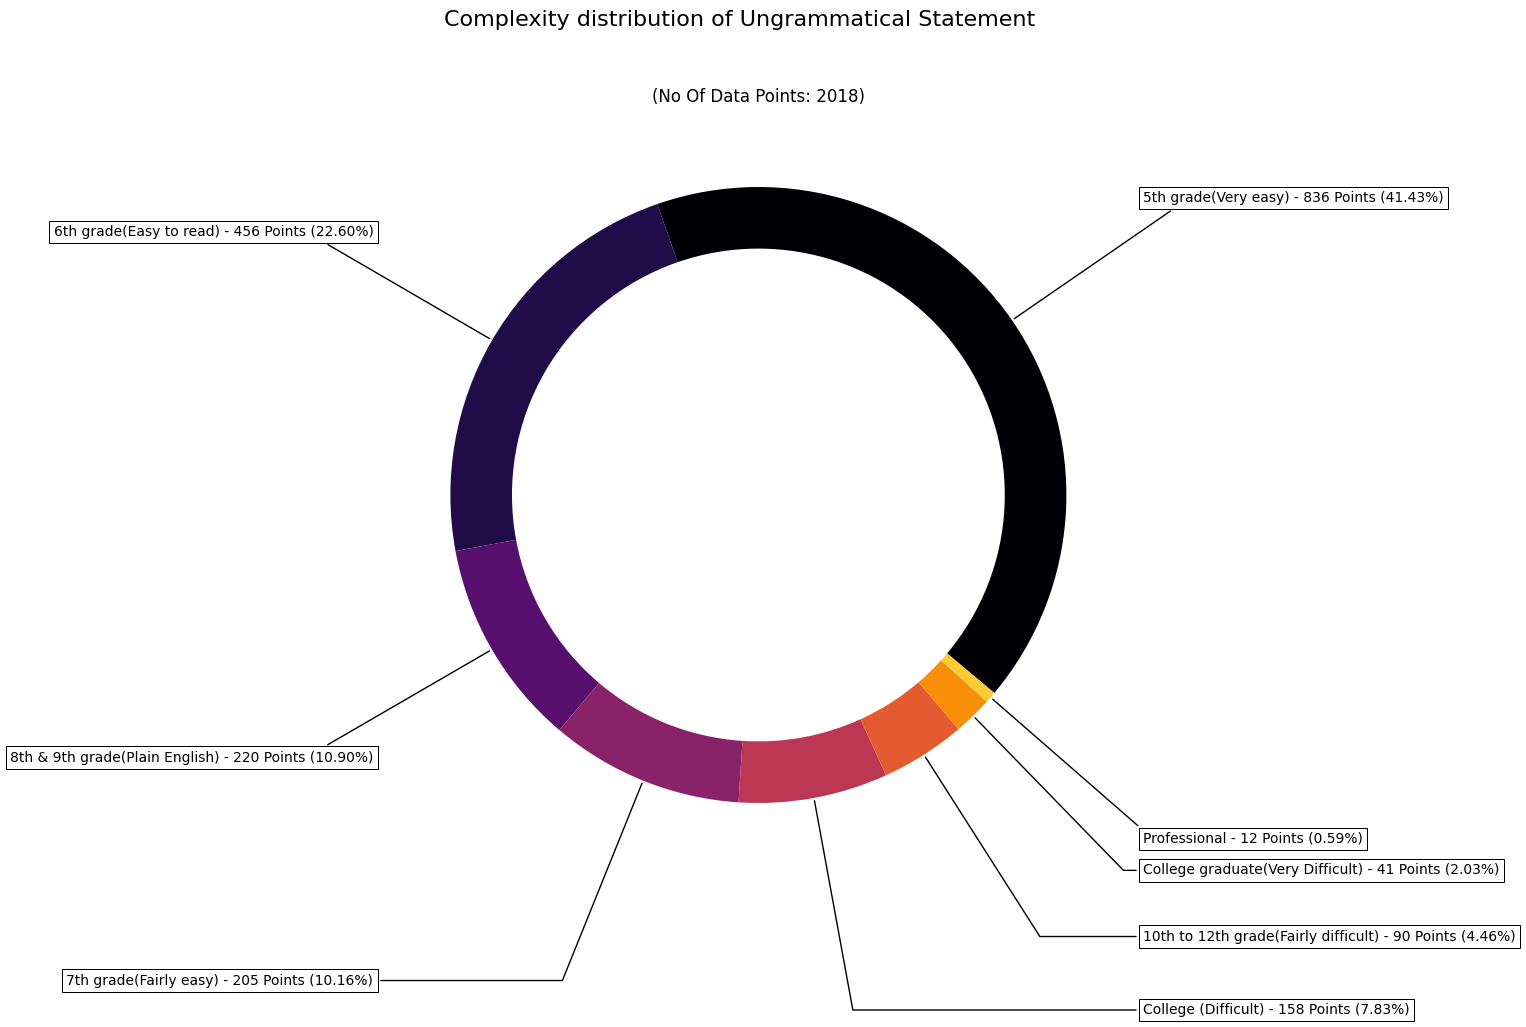

In [ ]:
plot_complexity(df,'ungrammatical_complexity',title='Complexity distribution of Ungrammatical Statement' )

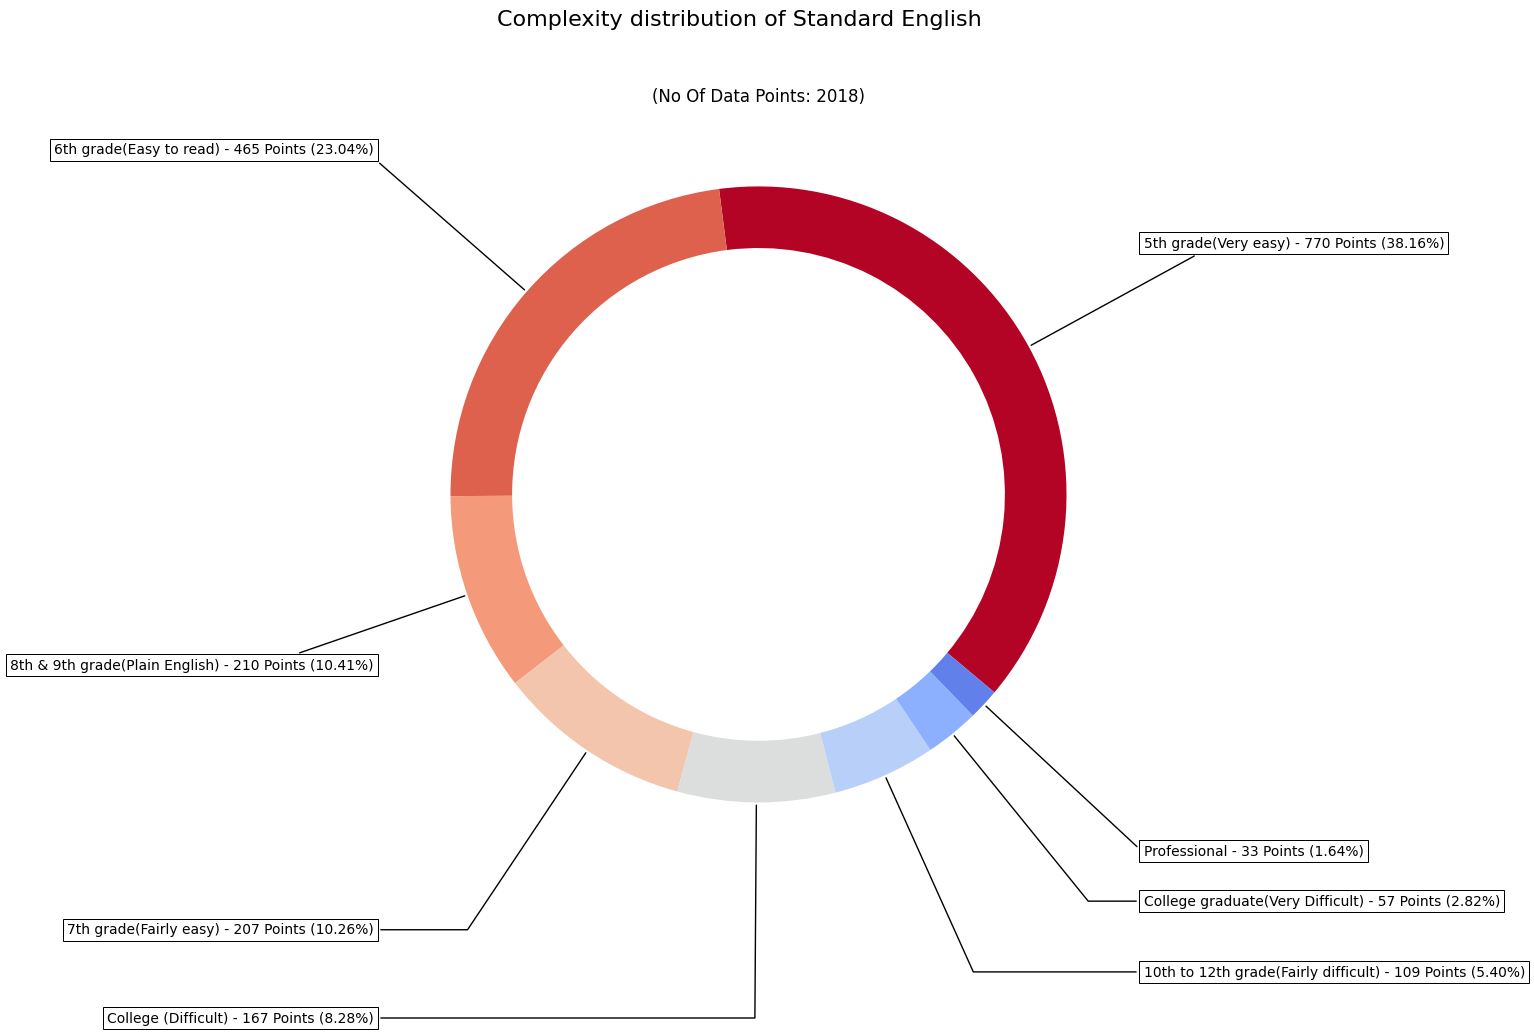

In [ ]:
plot_complexity(df,'standard_complexity',title='Complexity distribution of Standard English' )

**Train Test Split**

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,RNN
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
from datetime import datetime
import pytz
from tensorflow.keras.callbacks import LearningRateScheduler,TensorBoard,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,Nadam
import warnings
warnings.filterwarnings('ignore')
import nltk.translate.bleu_score as bleu
import random
from tqdm import tqdm
import shutil
import io
from nltk.translate.gleu_score import sentence_gleu
import pickle

In [ ]:
df.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,ungrammatical_statement_length,standard_english_length,standard_english_polscore,ungrammatical_statement_polscore,ungrammatical_complexity_score,standard_complexity_score,ungrammatical_complexity,standard_complexity
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,6,6,-0.2,-0.2,90.77,90.77,5th grade(Very easy),5th grade(Very easy)
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,6,6,0.0,0.0,90.77,90.77,5th grade(Very easy),5th grade(Very easy)
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,5,5,0.0,0.0,66.40,66.40,8th & 9th grade(Plain English),8th & 9th grade(Plain English)
3,4,Verb Tense Errors,He do not know the answer.,He does not know the answer.,5,5,0.0,0.0,99.23,99.23,5th grade(Very easy),5th grade(Very easy)
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,6,6,0.0,0.0,116.15,99.23,5th grade(Very easy),5th grade(Very easy)


In [ ]:
df_new = df[df['ungrammatical_statement_length'] <= 12]
df_new.shape

(1839, 12)

In [ ]:
df = df[['Standard English','Ungrammatical Statement']]

In [ ]:
df.shape

(2018, 2)

In [ ]:
df[df.isna().any(axis=1)]

,Standard English,Ungrammatical Statement


**Train Test Split**

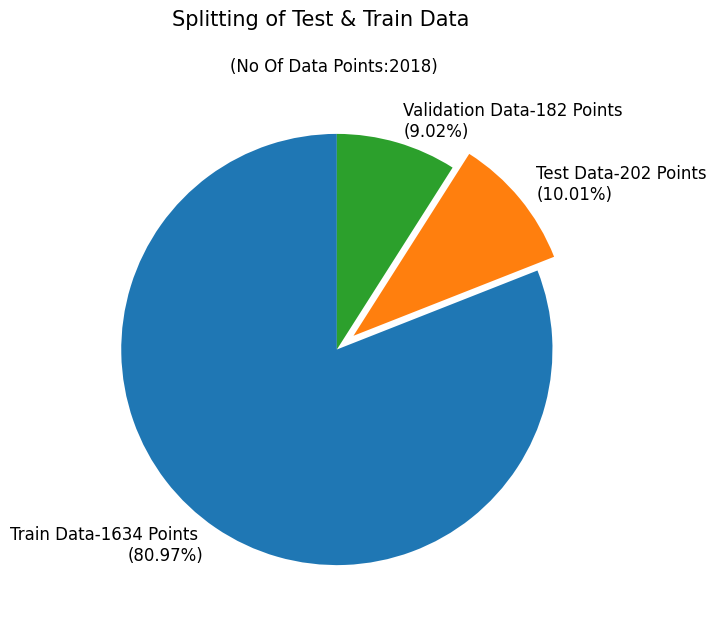

In [ ]:
train,test = train_test_split(df, test_size=0.1,random_state=15)
train,validation = train_test_split(train, test_size=0.1)
fig,ax = plt.subplots(figsize =(10, 7))
labels_split = ['Train', 'Test','Validation']
sizes_split = [len(train),len(test),len(validation)]
pcts_split = [f'{l} Data-{s} Points \n({s*100/sum(sizes_split):.2f}%)' for s,l in zip(sizes_split, labels_split)]
ax.pie(sizes_split, labels = pcts_split, startangle = 90,
       explode=(0,0.1,0),textprops = {"fontsize":12} )

plt.suptitle(f'Splitting of Test & Train Data ', fontsize = 15)
plt.title(f'(No Of Data Points:{sum(sizes_split)}) ', fontsize = 12)
plt.show()

In [ ]:
train['dec_standard_inp'] = '<start> ' + train['Standard English'].astype(str)
train['dec_standard_out'] = train['Standard English'].astype(str) + ' <end>'

validation['dec_standard_inp'] = '<start> ' + validation['Standard English'].astype(str)
validation['dec_standard_out'] = validation['Standard English'].astype(str) + ' <end>'

test['dec_standard_inp'] = '<start> ' + test['Standard English'].astype(str)
test['dec_standard_out'] = test['Standard English'].astype(str) + ' <end>'

In [ ]:
train.sample(5)

,Standard English,Ungrammatical Statement,dec_standard_inp,dec_standard_out
1230,This is a surprise for me.,This is an unexpected surprise for me.,<start> This is a surprise for me.,This is a surprise for me. <end>
772,"She likes to travel, and she has been to many ...",She likes to travel she has been to many count...,"<start> She likes to travel, and she has been ...","She likes to travel, and she has been to many ..."
613,He is not only a good singer but also a good d...,He is not only a good singer but also a good d...,<start> He is not only a good singer but also ...,He is not only a good singer but also a good d...
337,The concert will be held at the stadium.,The concert will be held in the stadium.,<start> The concert will be held at the stadium.,The concert will be held at the stadium. <end>
847,. The early bird catches the worm.,". The early bird catches the worm, but that is...",<start> . The early bird catches the worm.,. The early bird catches the worm. <end>


In [ ]:
test.sample(5)

,Standard English,Ungrammatical Statement,dec_standard_inp,dec_standard_out
513,". It is raining outside, so do not forget to t...",". It is raining outside, so do not forget to t...","<start> . It is raining outside, so do not for...",". It is raining outside, so do not forget to t..."
1995,"The book is engaging, informative, and uses re...","The book is engaging, informative, and using r...","<start> The book is engaging, informative, and...","The book is engaging, informative, and uses re..."
1196,All the paintings in this gallery are modern art.,All of the paintings in this gallery are moder...,<start> All the paintings in this gallery are ...,All the paintings in this gallery are modern a...
1158,"The vacation package includes flights, accommo...","The vacation package includes flights, accommo...","<start> The vacation package includes flights,...","The vacation package includes flights, accommo..."
430,The cat chased the mouse but could not catch it.,The cat chased the mouse but it could not catc...,<start> The cat chased the mouse but could not...,The cat chased the mouse but could not catch i...


In [ ]:
validation.sample(5)

,Standard English,Ungrammatical Statement,dec_standard_inp,dec_standard_out
1909,The students aimed to work collaboratively on ...,The students aimed to collaboratively work on ...,<start> The students aimed to work collaborati...,The students aimed to work collaboratively on ...
1681,He is burning the candle at both ends.,He is burning candle both ends.,<start> He is burning the candle at both ends.,He is burning the candle at both ends. <end>
485,The car is parked in the driveway behind the h...,The car is parked in the driveway behind the h...,<start> The car is parked in the driveway behi...,The car is parked in the driveway behind the h...
473,They visited their grandparents on the weekend.,They visited their grandparents on the weekend.,<start> They visited their grandparents on the...,They visited their grandparents on the weekend...
318,She is waiting at the bus stop.,She is waiting the bus stop.,<start> She is waiting at the bus stop.,She is waiting at the bus stop. <end>


In [ ]:
train.to_csv('train_20211112.csv')
validation.to_csv('validation_20211112.csv')
test.to_csv('test_20211112.csv')

# **Tokenizer**

In [ ]:
tokenizer_enc = Tokenizer(filters='#$%&()*+/=?@[\\]^_`{|}~\t\n',lower=False)
tokenizer_enc.fit_on_texts(train['Ungrammatical Statement'].astype(str).values)

In [ ]:
tokenizer_dec = Tokenizer(filters='#$%&()*+/=?@[\\]^_`{|}~\t\n',lower=False)
tokenizer_dec.fit_on_texts(train['dec_standard_inp'].astype(str).values)

In [ ]:
vocab_size_enc=len(tokenizer_enc.word_index.keys())
print('Encoder words vocab size:',vocab_size_enc)

Encoder words vocab size: 3725


In [ ]:
vocab_size_dec=len(tokenizer_dec.word_index.keys())
print('Decoder words vocab size::',vocab_size_dec)

Decoder words vocab size:: 3515


In [ ]:
tokenizer_dec.word_index['<start>'],tokenizer_dec.word_index.get('<end>', None)

(1, None)

In [ ]:
tokenizer_dec.word_index['<end>'] = max(tokenizer_dec.word_index.values()) + 1

In [ ]:
with open('/content/tokenizer_enc_20211112.pkl', 'wb') as f:
  pickle.dump(tokenizer_enc, f)

with open('/content/tokenizer_dec_20211112.pkl', 'wb') as f:
  pickle.dump(tokenizer_dec, f)

In [ ]:
tokenizer_enc = Tokenizer(filters='#$%&()*+/=?@[\\]^_`{|}~\t\n',lower=False)
tokenizer_enc.fit_on_texts(train['Ungrammatical Statement'].astype(str).values)
tokenizer_dec = Tokenizer(filters='#$%&()*+/=?@[\\]^_`{|}~\t\n',lower=False)
tokenizer_dec.fit_on_texts(train['dec_standard_inp'].astype(str).values)

vocab_size_enc=len(tokenizer_enc.word_index.keys())
print('Encoder words vocab size:',vocab_size_enc)
vocab_size_dec=len(tokenizer_dec.word_index.keys())
print('Decoder words vocab size::',vocab_size_dec)

tokenizer_dec.word_index['<start>'],tokenizer_dec.word_index.get('<end>', None)
tokenizer_dec.word_index['<end>'] = max(tokenizer_dec.word_index.values()) + 1

#text2seq
train_enc_inp = tokenizer_enc.texts_to_sequences(train['Ungrammatical Statement'].astype(str).values)
validation_enc_inp = tokenizer_enc.texts_to_sequences(validation['Ungrammatical Statement'].astype(str).values)
test_enc_inp = tokenizer_enc.texts_to_sequences(test['Ungrammatical Statement'].astype(str).values)

#padding
max_seq_len = 12
train_enc_inp = pad_sequences(train_enc_inp, maxlen=max_seq_len, padding='post', truncating='post')
validation_enc_inp = pad_sequences(validation_enc_inp, maxlen=max_seq_len, padding='post', truncating='post')

#text2seq
train_dec_inp = tokenizer_dec.texts_to_sequences(train['dec_standard_inp'].astype(str).values)
validation_dec_inp = tokenizer_dec.texts_to_sequences(validation['dec_standard_inp'].astype(str).values)

#padding
train_dec_inp = pad_sequences(train_dec_inp, maxlen=max_seq_len+1, padding='post', truncating='post')
validation_dec_inp = pad_sequences(validation_dec_inp, maxlen=max_seq_len+1, padding='post', truncating='post')

#text2seq
train_dec_out = tokenizer_dec.texts_to_sequences(train['dec_standard_out'].astype(str).values)
validation_dec_out = tokenizer_dec.texts_to_sequences(validation['dec_standard_out'].astype(str).values)

#padding
train_dec_out = pad_sequences(train_dec_out, maxlen=max_seq_len+1, padding='post', truncating='post')
validation_dec_out = pad_sequences(validation_dec_out, maxlen=max_seq_len+1, padding='post', truncating='post')

Encoder words vocab size: 3725
Decoder words vocab size:: 3515


**Text to Sequence**

Mean Word Count:9.201958384332926


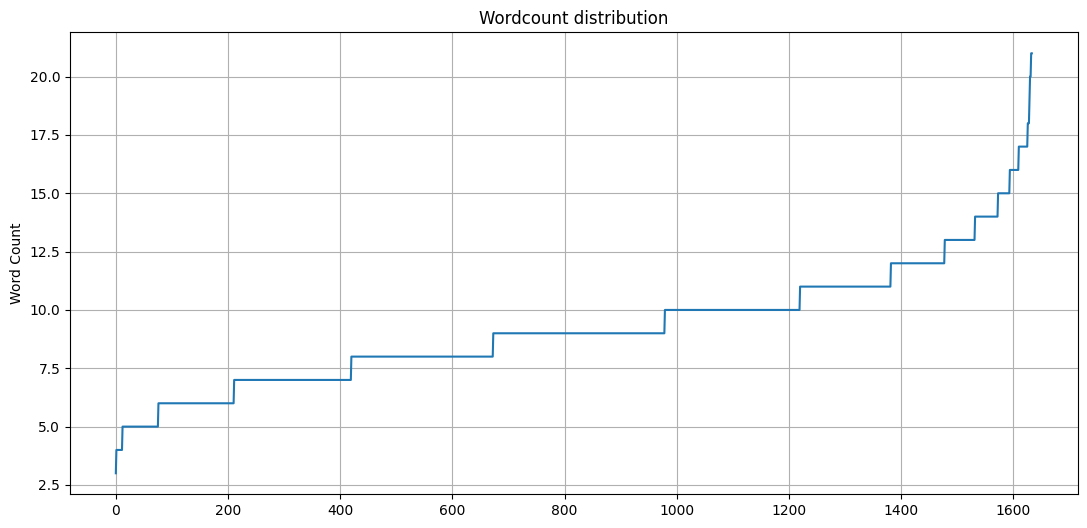

In [ ]:
content=train['Ungrammatical Statement'].astype('str')
content_word_count=[len(content.iloc[i].split()) for i in range(len(content))]
mean_word_count=np.mean(content_word_count)
print(f'Mean Word Count:{mean_word_count}')
index=[i for i in range(0,len(content_word_count))]
fig, ax=plt.subplots(figsize=(13, 6))
plt.plot(index,sorted(content_word_count))
plt.grid()
plt.title("Wordcount distribution")
plt.ylabel("Word Count")
plt.show()

In [ ]:
#text2seq
train_enc_inp = tokenizer_enc.texts_to_sequences(train['Ungrammatical Statement'].astype(str).values)
validation_enc_inp = tokenizer_enc.texts_to_sequences(validation['Ungrammatical Statement'].astype(str).values)
test_enc_inp = tokenizer_enc.texts_to_sequences(test['Ungrammatical Statement'].astype(str).values)

#padding
max_seq_len = 12
train_enc_inp = pad_sequences(train_enc_inp, maxlen=max_seq_len, padding='post', truncating='post')
validation_enc_inp = pad_sequences(validation_enc_inp, maxlen=max_seq_len, padding='post', truncating='post')
test_enc_inp = pad_sequences(test_enc_inp, maxlen=max_seq_len, padding='post', truncating='post')

In [ ]:
#text2seq
train_dec_inp = tokenizer_dec.texts_to_sequences(train['dec_standard_inp'].astype(str).values)
validation_dec_inp = tokenizer_dec.texts_to_sequences(validation['dec_standard_inp'].astype(str).values)
test_dec_inp = tokenizer_dec.texts_to_sequences(test['dec_standard_inp'].astype(str).values)

#padding
train_dec_inp = pad_sequences(train_dec_inp, maxlen=max_seq_len+1, padding='post', truncating='post')
validation_dec_inp = pad_sequences(validation_dec_inp, maxlen=max_seq_len+1, padding='post', truncating='post')
test_dec_inp = pad_sequences(test_dec_inp, maxlen=max_seq_len+1, padding='post', truncating='post')

In [ ]:
#text2seq
train_dec_out = tokenizer_dec.texts_to_sequences(train['dec_standard_out'].astype(str).values)
validation_dec_out = tokenizer_dec.texts_to_sequences(validation['dec_standard_out'].astype(str).values)
test_dec_out = tokenizer_dec.texts_to_sequences(test['dec_standard_out'].astype(str).values)

#padding
train_dec_out = pad_sequences(train_dec_out, maxlen=max_seq_len+1, padding='post', truncating='post')
validation_dec_out = pad_sequences(validation_dec_out, maxlen=max_seq_len+1, padding='post', truncating='post')
test_dec_out = pad_sequences(test_dec_out, maxlen=max_seq_len+1, padding='post', truncating='post')

In [ ]:
import pickle

# Function to save data
def save_data(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

# List of data to save along with their respective filenames
datasets = [
    (train_enc_inp, '/content/train_enc_inp.pkl'),
    (validation_enc_inp, '/content/val_enc_inp.pkl'),
    (test_enc_inp, '/content/test_enc_inp.pkl'),
    (train_dec_inp, '/content/train_dec_inp.pkl'),
    (validation_dec_inp, '/content/val_dec_inp.pkl'),
    (test_dec_inp, '/content/test_dec_inp.pkl'),
    (train_dec_out, '/content/train_dec_out.pkl'),
    (validation_dec_out, '/content/val_dec_out.pkl'),
    (test_dec_out, '/content/test_dec_out.pkl')
]

# Save all datasets in one loop
for data, filename in datasets:
    save_data(data, filename)

In [ ]:
#555

In [ ]:
!pip install nltk --upgrade

In [ ]:
!pip install tensorflow

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,RNN
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
from datetime import datetime
import pytz
from tensorflow.keras.callbacks import LearningRateScheduler,ModelCheckpoint,EarlyStopping,TensorBoard,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,Nadam
import warnings
warnings.filterwarnings('ignore')
import nltk.translate.bleu_score as bleu
import random
from tqdm import tqdm
import shutil
import io
from nltk.translate.gleu_score import sentence_gleu
import pickle

**Encoder-Decoder**

In [ ]:
tokenizer_enc = pickle.load(open(r"/content/tokenizer_enc_20211112.pkl", "rb"))
tokenizer_dec = pickle.load(open(r"/content/tokenizer_dec_20211112.pkl", "rb"))

In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,
    encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,vocab_size,output_dim,enc_units,input_length):

        #Initialize Embedding layer
        #Intialize Encoder LSTM layer

        super().__init__()
        self.vocab_size = vocab_size
        self.output_dim = output_dim
        self.input_length = input_length
        self.enc_units = enc_units
        self.enc_output = 0
        self.enc_state_h = 0
        self.enc_state_c = 0

        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.output_dim,
                                   input_length=self.input_length,mask_zero=True,name="embedding_layer_encoder")

        self.enc = LSTM(self.enc_units, return_state=True,return_sequences=True, name="Encoder_LSTM")


    def call(self,input_sequence,states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        input_embedding = self.embedding(input_sequence)
        self.enc_output,self.enc_state_h,self.enc_state_c = self.enc(input_embedding,initial_state=states)

        return self.enc_output, self.enc_state_h,self.enc_state_c

    def initialize_states(self,batch_size):
        '''
        Given a batch size it will return intial hidden state and intial cell state.
        If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
        '''
        ini_hidden_state = tf.zeros(shape=(batch_size,self.enc_units))
        ini_cell_state = tf.zeros(shape=(batch_size,self.enc_units))

        return ini_hidden_state,ini_cell_state

In [ ]:
# # Define hyperparameters
# vocab_size = 10000   # Example vocabulary size
# output_dim = 128     # Size of the embedding vectors
# enc_units = 256      # Number of units in the LSTM
# input_length = 12    # Length of input sequences

# # Create an instance of the Encoder
# encoder = Encoder(vocab_size, output_dim, enc_units, input_length)

# # Sample input sequence (batch_size, input_length)
# import numpy as np
# input_sequence = np.random.randint(1, vocab_size, size=(32, input_length))  # Example batch of sequences

# # Forward pass
# encoder_output, hidden_state, cell_state = encoder.call(input_sequence)
# print(encoder_output.shape)  # Check the output shape


In [ ]:
class Decoder(tf.keras.Model):
    '''
    Decoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,vocab_size,output_dim,dec_units,input_length):

        #Initialize Embedding layer
        #Intialize Decoder LSTM layer

        super().__init__()
        self.vocab_size = vocab_size
        self.output_dim = output_dim
        self.dec_units = dec_units
        self.input_length = input_length

        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.output_dim,
                                   input_length=self.input_length,mask_zero=True,name="embedding_layer_decoder")

        self.dec = LSTM(self.dec_units, return_sequences=True, return_state=True, name="Decoder_LSTM")

    def call(self,input_sequence,initial_states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm

          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''

        target_embedding = self.embedding(input_sequence)
        dec_output,dec_state_h,dec_state_c = self.dec(target_embedding, initial_state=initial_states)
        return dec_output,dec_state_h,dec_state_c

In [ ]:
# # Define hyperparameters
# vocab_size = 10000   # Example vocabulary size
# output_dim = 128     # Size of the embedding vectors
# dec_units = 256      # Number of units in the LSTM
# input_length = 13    # Length of input sequences

# # Create an instance of the Decoder
# decoder = Decoder(vocab_size, output_dim, dec_units, input_length)

# # Sample input sequence (batch_size, input_length)
# import numpy as np
# input_sequence = np.random.randint(1, vocab_size, size=(32, input_length))  # Example batch of sequences

# # Sample initial states (batch_size, dec_units)
# initial_states = (np.zeros((32, dec_units)), np.zeros((32, dec_units)))

# # Forward pass
# decoder_output, hidden_state, cell_state = decoder.call(input_sequence, initial_states)
# print(decoder_output.shape)  # Check the output shape

In [ ]:
class Encoder_decoder(tf.keras.Model):
    def __init__(self,enc_vocab_size,enc_output_dim,enc_inp_length,enc_units,
                 dec_vocab_size,dec_output_dim,dec_inp_length,dec_units,batch_size):

        super().__init__() # https://stackoverflow.com/a/27134600/4084039
        self.encoder = Encoder(vocab_size=enc_vocab_size, output_dim=enc_output_dim,
                               input_length=enc_inp_length, enc_units=enc_units)
        self.decoder = Decoder(vocab_size=dec_vocab_size, output_dim=dec_output_dim,
                               input_length=dec_inp_length, dec_units=dec_units)
        self.dense   = Dense(dec_vocab_size, activation='softmax')
        self.ini_states = self.encoder.initialize_states(batch_size=batch_size)

    def call(self,data):
        '''
        A. Pass the input sequence to Encoder layer -- Return encoder_output,encoder_final_state_h,encoder_final_state_c
        B. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h,encoder_final_state_C
        C. Pass the decoder_outputs into Dense layer

        Return decoder_outputs
        '''
        input,output = data[0], data[1]
        enc_output,enc_h,enc_c = self.encoder(input,self.ini_states)
        dec_output,dec_h,dec_c = self.decoder(output, [enc_h, enc_c])
        output = self.dense(dec_output)
        return output

In [ ]:
# # Assuming your parameters are defined as follows
# enc_vocab_size = 10000  # Example vocabulary size for encoder
# enc_output_dim = 256  # Embedding dimension for encoder
# enc_inp_length = 12  # Input sequence length for encoder
# enc_units = 256  # Number of LSTM units in encoder
# dec_vocab_size = 10000  # Example vocabulary size for decoder
# dec_output_dim = 256  # Embedding dimension for decoder
# dec_inp_length = 13  # Input sequence length for decoder
# dec_units = 256  # Number of LSTM units in decoder
# batch_size = 32  # Batch size for training

# # Instantiate the model
# model = Encoder_decoder(enc_vocab_size, enc_output_dim, enc_inp_length, enc_units,
#                         dec_vocab_size, dec_output_dim, dec_inp_length, dec_units, batch_size)

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Fit the model with training data (assuming you have your train_enc_inp and train_dec_out ready)
# model.fit([train_enc_inp_truncated, train_dec_inp_truncated],
#           train_dec_out_truncated,
#           validation_data=([val_enc_inp_truncated, val_dec_inp_truncated], val_dec_out_truncated),
#           epochs=30, batch_size=batch_size)

In [ ]:
#https://www.tensorflow.org/tutorials/text/image_captioning#model
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    """ Custom loss function that will not consider the loss for padded zeros.
    in this loss function we are ignoring the loss
    for the padded zeros. i.e when the input is zero then we do not need to worry what the output is.
    This padded zeros are added from our end
    during preprocessing to make equal length for all the sentences.

    """
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
enc_voc_size = len(tokenizer_enc.word_index) + 1
dec_voc_size = len(tokenizer_dec.word_index) + 1
embedd_dim = 100
enc_inp_len = 12
dec_inp_len = 13
lstm_size=128
batch_size=8

In [ ]:
# train_trunc_idx = (train_enc_inp.shape[0]//batch_size)*batch_size
# val_trunc_idx = (validation_enc_inp.shape[0]//batch_size)*batch_size

# train_enc_inp_truncated = train_enc_inp[:train_trunc_idx]
# train_dec_inp_truncated = train_dec_inp[:train_trunc_idx]
# train_dec_out_truncated = train_dec_out[:train_trunc_idx]

# val_enc_inp_truncated = validation_enc_inp[:val_trunc_idx]
# val_dec_inp_truncated = validation_dec_inp[:val_trunc_idx]
# val_dec_out_truncated = validation_dec_out[:val_trunc_idx]

In [ ]:
train_trunc_idx = (train_enc_inp.shape[0] // batch_size) * batch_size
val_trunc_idx = min(validation_enc_inp.shape[0], (validation_enc_inp.shape[0] // batch_size) * batch_size)

# Truncate training data to fit into batches
train_enc_inp_truncated = train_enc_inp[:train_trunc_idx]
train_dec_inp_truncated = train_dec_inp[:train_trunc_idx]
train_dec_out_truncated = train_dec_out[:train_trunc_idx]

# Avoid truncating validation data if smaller than batch size
val_enc_inp_truncated = validation_enc_inp[:val_trunc_idx] if val_trunc_idx > 0 else validation_enc_inp
val_dec_inp_truncated = validation_dec_inp[:val_trunc_idx] if val_trunc_idx > 0 else validation_dec_inp
val_dec_out_truncated = validation_dec_out[:val_trunc_idx] if val_trunc_idx > 0 else validation_dec_out


In [ ]:
model  = Encoder_decoder(enc_vocab_size=enc_voc_size,enc_output_dim=embedd_dim,
                         enc_inp_length=enc_inp_len,enc_units=lstm_size,
                         dec_vocab_size=dec_voc_size,dec_output_dim=embedd_dim,
                         dec_inp_length=dec_inp_len,dec_units=lstm_size,
                         batch_size=batch_size)

#Tensorboard
!rm -rf ./logs/fit
BST = pytz.timezone('Asia/Dhaka')
log_dir=f'/content/vanila_enc_dec_word/tb_logs/{datetime.now(BST).strftime("%Y%m%d%H%M%S")}'
tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=1,mode='min')
reducelr = ReduceLROnPlateau(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, factor=0.9)
check_point = ModelCheckpoint('/content/vanila_enc_dec_word.weights.h5', monitor='val_loss',
                              save_best_only=True, save_weights_only=True,mode='min', verbose=0)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss=loss_function)

In [ ]:
print("Training Input Shapes:")
print(f"Encoder input shape: {train_enc_inp_truncated.shape}")
print(f"Decoder input shape: {train_dec_inp_truncated.shape}")
print(f"Decoder output shape: {train_dec_out_truncated.shape}")

print("Validation Input Shapes:")
print(f"Validation Encoder input shape: {val_enc_inp_truncated.shape}")
print(f"Validation Decoder input shape: {val_dec_inp_truncated.shape}")
print(f"Validation Decoder output shape: {val_dec_out_truncated.shape}")

Training Input Shapes:
Encoder input shape: (1632, 12)
Decoder input shape: (1632, 13)
Decoder output shape: (1632, 13)
Validation Input Shapes:
Validation Encoder input shape: (176, 12)
Validation Decoder input shape: (176, 13)
Validation Decoder output shape: (176, 13)


In [ ]:
model.fit(x=[train_enc_inp_truncated,train_dec_inp_truncated],y=train_dec_out_truncated,
          validation_data=([val_enc_inp_truncated,val_dec_inp_truncated],val_dec_out_truncated),
          epochs=30, batch_size=batch_size,callbacks=[tensorboard_callback,earlystop,reducelr,check_point])

Epoch 1/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - loss: 5.1527 - val_loss: 3.4590 - learning_rate: 0.0010
Epoch 2/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - loss: 4.1489 - val_loss: 3.3096 - learning_rate: 0.0010
Epoch 3/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 3.9294 - val_loss: 3.2580 - learning_rate: 0.0010
Epoch 4/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - loss: 3.6955 - val_loss: 3.2097 - learning_rate: 0.0010
Epoch 5/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - loss: 3.5953 - val_loss: 3.1679 - learning_rate: 0.0010
Epoch 6/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - loss: 3.4241 - val_loss: 3.1337 - learning_rate: 0.0010
Epoch 7/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - loss: 3.2591 - val_loss: 3.1033 - learning_rate: 0.0010
Epoch 8/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 3.1885 - val_loss: 3.0448 - learning_rate: 0.0010
Epoch 9/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - loss: 2.9953 - val_loss: 2.9920 - learning_rate:

In [ ]:
model.summary()

Model: "encoder_decoder_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_13 (Encoder)                 │ ?                           │         489,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_14 (Decoder)                 │ ?                           │         468,948 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (8, 13, 3517)               │         453,693 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,237,469 (16.16 MB)

 Trainable params: 1,412,489 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,824,980 (10.78 MB)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/vanila_enc_dec_word/tb_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 37687), started 1:05:29 ago. (Use '!kill 37687' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
corrc_wrd_idx_dict = tokenizer_dec.word_index
corrc_idx_wrd_dict = {v: k for k, v in corrc_wrd_idx_dict.items()}

def predict(input_sentence):
    """
    this function takes incorrect input sentences s input and returns correct sentences
    """
    input_sentence = tokenizer_enc.texts_to_sequences([input_sentence])
    ini_hidden_state = tf.zeros([1,64])
    ini_cell_state = tf.zeros([1,64])
    ini_states = [ini_hidden_state,ini_cell_state]
    pred_total = []
    enc_output, enc_state_h, enc_state_c = model.layers[0](np.expand_dims(input_sentence[0],0),ini_states)
    states_values = [enc_state_h, enc_state_c]
    pred = []
    sentence = []
    cur_vec = np.array([[1]])
    for i in range(12):
        dec_output, dec_state_h, dec_state_c = model.layers[1](cur_vec,states_values)
        output = model.layers[2](dec_output)
        states_values = [dec_state_h, dec_state_c]
        cur_vec = np.reshape(np.argmax(output), (1, 1))
        if corrc_idx_wrd_dict[cur_vec[0][0]] == '<end>':
            break
        pred.append(cur_vec[0][0])
    for i in pred:
        sentence.append(corrc_idx_wrd_dict[i])
    return " ".join(sentence)

In [ ]:
model.save('/content/model_refined.keras')

In [ ]:
def calculate_glue(df):
    glue_score_arr = []
    for i in tqdm(range(500)):
        reference = [df['Standard English'].iloc[i].split()]
        pred = predict(df['Ungrammatical Statement'].iloc[i])
        candidate = pred.split()
        glue_score_arr.append(sentence_gleu(reference, candidate))
    return np.mean(glue_score_arr)

def show_results(df,samples=10):
    sample_test = df.sample(samples)
    for idx,row in sample_test.iterrows():
        print(f"Input:{row['Ungrammatical Statement']}")
        print(f"Actual:{row['Standard English']}")
        print(f"Predicted:{predict(row['Ungrammatical Statement'])}")
        print("="*50)

In [ ]:
print(f"GLEU Score on Train data: {calculate_glue(train)}")

  0%|          | 0/500 [00:00<?, ?it/s]


InvalidArgumentError: Exception encountered when calling LSTMCell.call().

[1m{{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [1,64], In[1]: [128,512] [Op:MatMul] name: [0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(1, 100), dtype=float32)
  • states=('tf.Tensor(shape=(1, 64), dtype=float32)', 'tf.Tensor(shape=(1, 64), dtype=float32)')
  • training=False

In [ ]:
show_results(test)